In [3]:
import qiskit
from qiskit import *
nqubits = 3
circuit = QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])


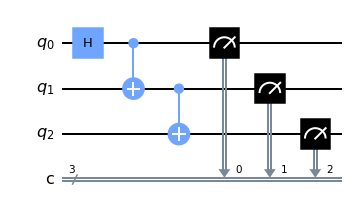

In [4]:
%matplotlib inline
circuit.draw(output='mpl')

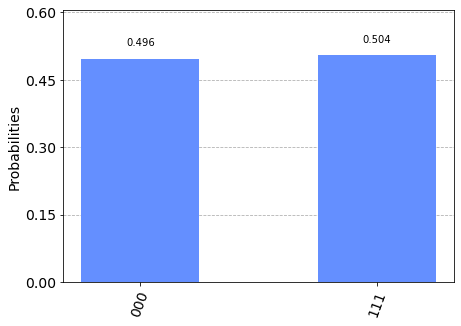

In [5]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots = 1024).result()

from qiskit.tools.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))

In [6]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_santiago')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


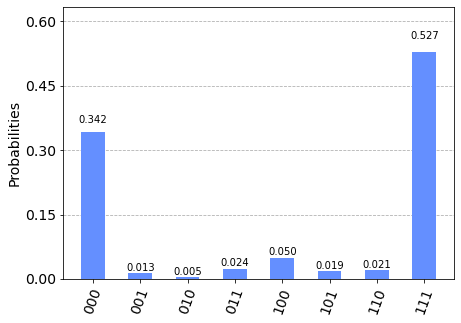

In [7]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

C:\Users\mjankowski\AppData\Local\Temp\ipykernel_69716\1690933809.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)


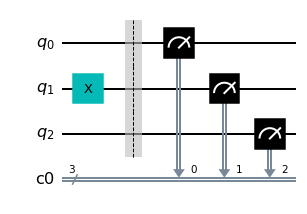

In [8]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')
cal_circuits[2].draw(output='mpl')

In [9]:
len(cal_circuits)


8

In [10]:
cal_job = execute(cal_circuits, backend=qcomp, optimization_level=0, shots=1024)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

629060bde3e89f4a15d46b5d
Job Status: job has successfully run


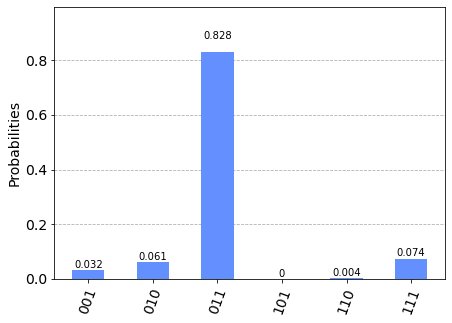

In [11]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

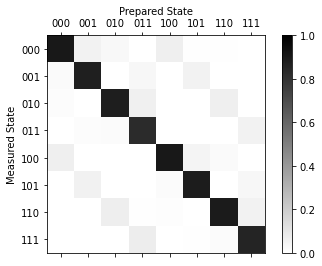

In [12]:
meas_filtter = CompleteMeasFitter(cal_results, state_labels)
meas_filtter.plot_calibration()

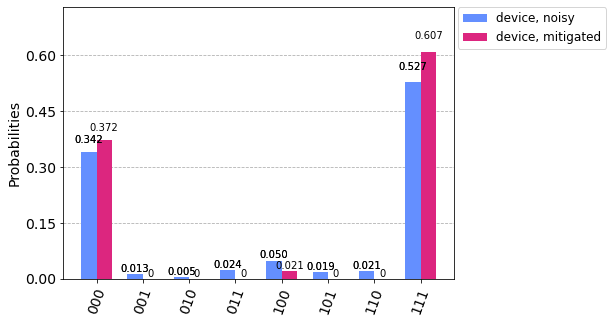

In [13]:
meas_filtter = meas_filtter.filter
mitigated_result = meas_filtter.apply(device_result)
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

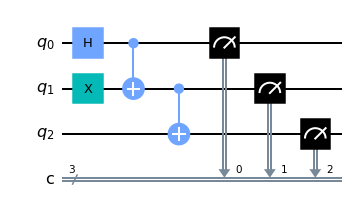

In [14]:
#Check error on new circut
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output='mpl')


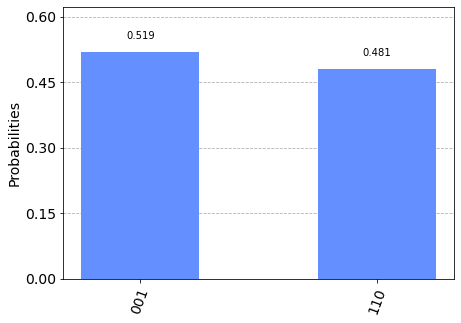

In [15]:
plot_histogram(execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2))

In [18]:
device_counts_2 = execute(circuit2, backend=qcomp, shots=1024).result().get_counts(circuit2)

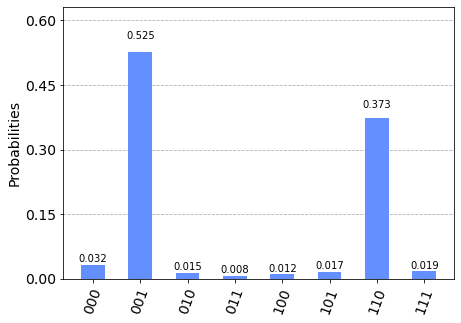

In [ ]:
plot_histogram(device_counts_2)

In [ ]:
device_mitigated_counts_2 = meas_filtter.apply(device_counts_2)
plot_histogram(device_mitigated_counts_2)